## Import Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import cv2, os
from keras.utils import to_categorical

## Import Dataset

In [5]:
data_path = r"C:\\Users\\DELL\\ML-DL\\Edxcope\\datasets\\catsanddogs_5340\\PetImages"


categories = os.listdir(data_path) 
labels = np.arange(len(categories))     
label_dict = dict(zip(categories, labels))    

print(categories)
print(labels)
print(label_dict)

['Cat', 'Dog']
[0 1]
{'Cat': 0, 'Dog': 1}


## Make The Dataset

In [6]:
img_size = 50                                                

data = []
target = []

for category in categories:
    
    folder_path = os.path.join(data_path, category)         
    img_names = os.listdir(folder_path)                     
    
    for img_name in img_names:
        img_path = os.path.join(folder_path, img_name)
        
        try:
            img = cv2.imread(img_path)
            # cv2.imshow("LIVE", img)                         
            # cv2.waitKey(100)                                
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
            resized = cv2.resize(gray, (img_size, img_size))
            cv2.imshow("LIVE", resized)                        # See loaded iamges previews       
            cv2.waitKey(100)                           
        
            data.append(resized)                  
            target.append(label_dict[category])              
        
        except Exception as error:
            print(img_path, error)

C:\\Users\\DELL\\ML-DL\\Edxcope\\datasets\\catsanddogs_5340\\PetImages\Cat\7968.jpg OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

C:\\Users\\DELL\\ML-DL\\Edxcope\\datasets\\catsanddogs_5340\\PetImages\Cat\8470.jpg OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

C:\\Users\\DELL\\ML-DL\\Edxcope\\datasets\\catsanddogs_5340\\PetImages\Cat\850.jpg OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

C:\\Users\\DELL\\ML-DL\\Edxcope\\datasets\\catsanddogs_5340\\PetImages\Cat\9565.jpg OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

C:\\Users\\DE

C:\\Users\\DELL\\ML-DL\\Edxcope\\datasets\\catsanddogs_5340\\PetImages\Dog\Thumbs.db OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'



In [7]:
# convert feature and target to arrays
data = np.array(data)
target = np.array(target)

In [8]:
print(data.shape)
print(target.shape)

(24966, 50, 50)
(24966,)


## Visualization

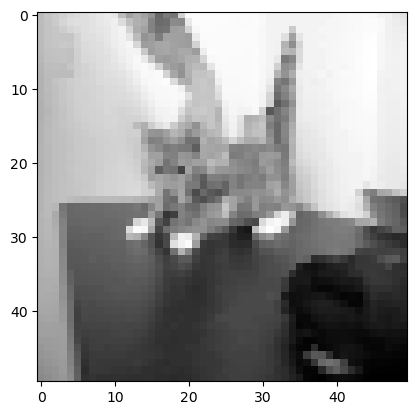

In [9]:
plt.imshow(data[0], cmap="gray")
plt.show()

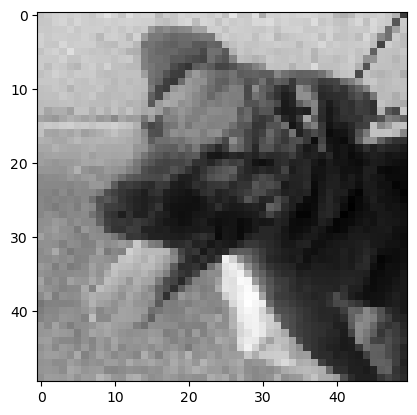

In [10]:
plt.imshow(data[20000], cmap="gray")
plt.show()

## Data Normalization 

In [11]:
data_new = data / 255.0  
data_new = np.reshape(data_new, (data_new.shape[0], data_new.shape[1], data_new.shape[1], 1))  

print(data_new.shape)

(24966, 50, 50, 1)


## Catergorical Encoding

In [12]:
target_new = to_categorical(target)

## Save Datasets

In [13]:
np.save("data", data_new)
np.save("target", target_new)